# The isothermal-$\beta$ model

In this notebook, we will use `MockSZ` to generate spatially extended maps of a galaxy cluster using the so-called isothermal-$\beta$ model. In this spherically symmetric model, $T_\mathrm{e}$ is assumed constant across the cluster.

We will build a model, based on the CL 0016+16 cluster. Then, for several frequencies we plot the spatially extended effect for both the tSZ and kSZ. The frequency range spans 220 to 440 GHz, which is the frequency range of the DESHIMA 2.0 spectrometer.

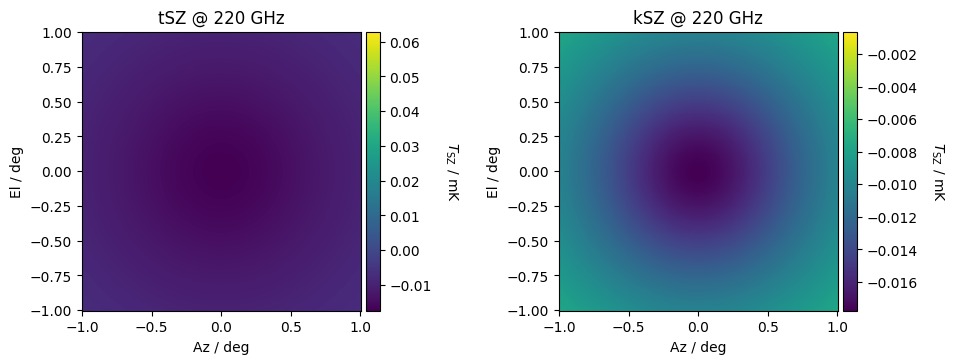

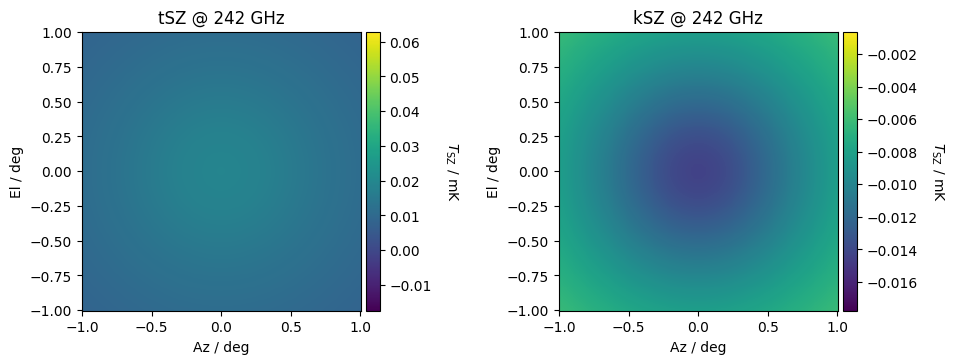

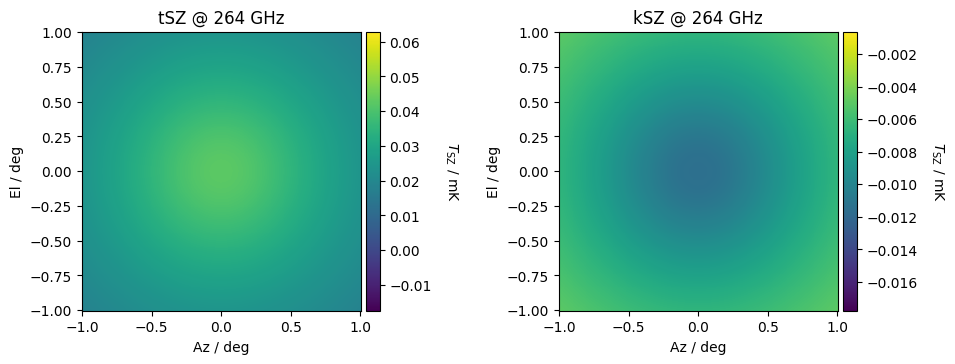

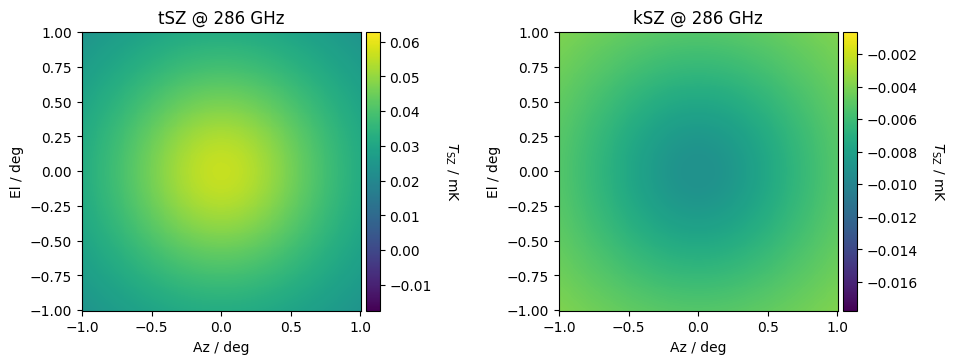

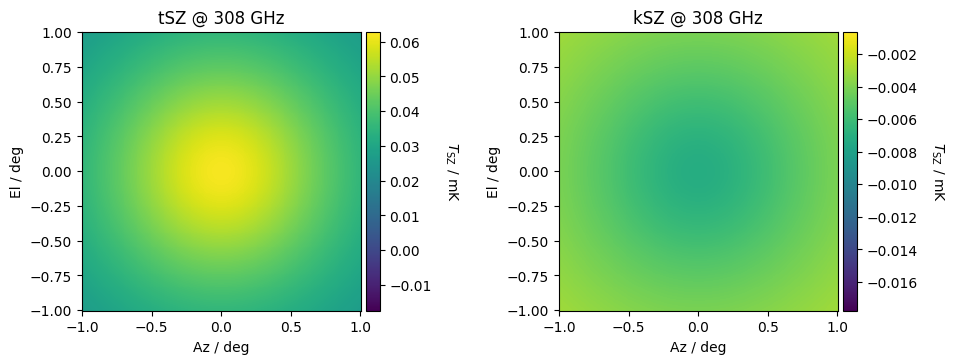

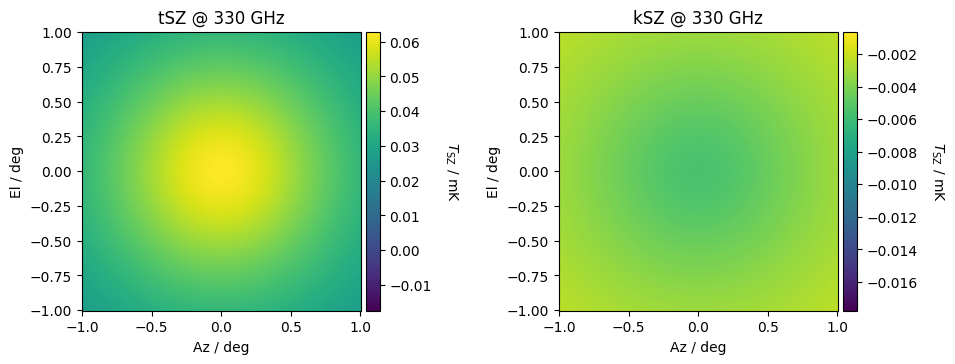

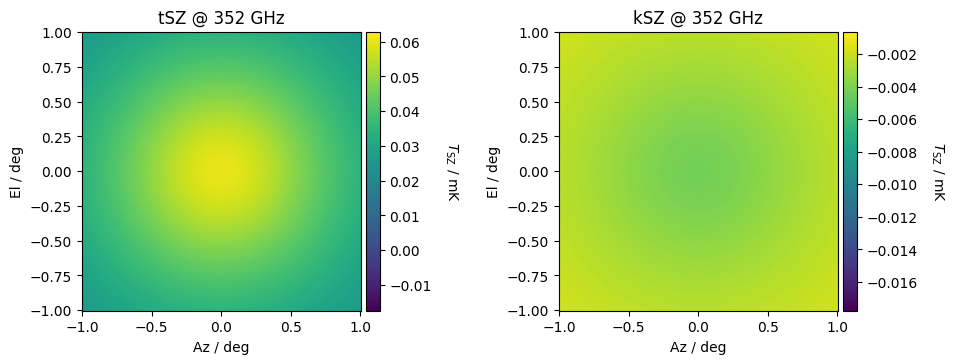

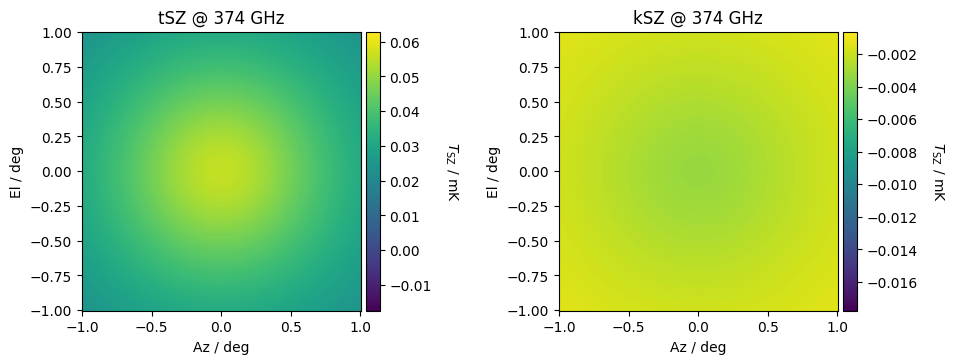

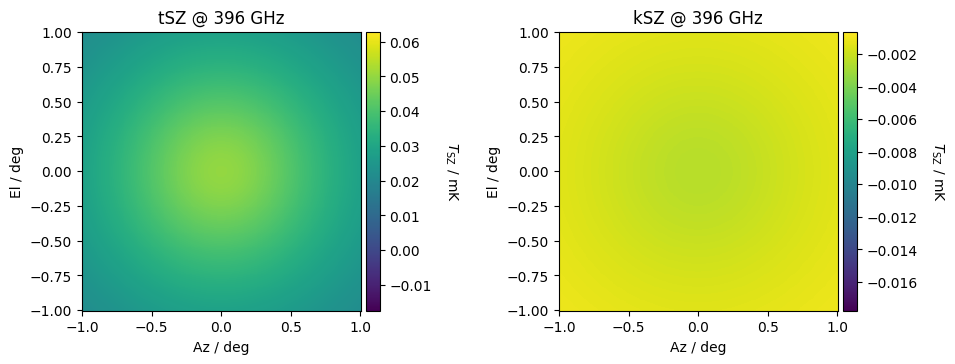

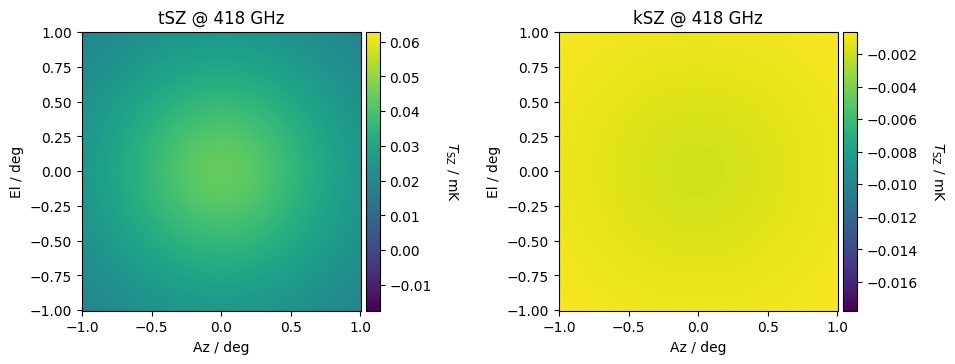

In [2]:
import MockSZ.Models as MModel
import MockSZ.Conversions as MConv

import numpy as np

import matplotlib.pyplot as pt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Te = MConv.eV_Temp(9e3)
ne0 = 1e-2 * 100**3
rc = MConv.pc_m(150e3)
beta = 0.73
Da = MConv.pc_m(760e6)
v_pec = 700e3

nu = np.linspace(220, 440, num=1000) * 1e9

isob = MModel.IsoBetaModel(Te, ne0, rc, beta, Da, v_pec=v_pec)

Az, El = np.mgrid[-1:1:300j, -1:1:300j]
theta = np.sqrt(Az**2 + El**2)

tSZ = MConv.SI_Temp(isob.tSZMap(theta, nu), nu) * 1e3 # T
kSZ = MConv.SI_Temp(isob.kSZMap(theta, nu), nu) * 1e3 # T

min_tplot = np.min(tSZ)
max_tplot = np.max(tSZ)

min_kplot = np.min(kSZ)
max_kplot = np.max(kSZ)

N = 10
step = int(1000 / N)

for i in range(N):
    fig, ax = pt.subplots(1,2, figsize=(10,5), gridspec_kw={"wspace":0.6})
    _t = ax[0].pcolormesh(Az, El, tSZ[:,:,i*step], vmin=min_tplot, vmax=max_tplot)
    _k = ax[1].pcolormesh(Az, El, kSZ[:,:,i*step], vmin=min_kplot, vmax=max_kplot)
    
    divider0 = make_axes_locatable(ax[0])
    divider1 = make_axes_locatable(ax[1])
    cax0 = divider0.append_axes('right', size='5%', pad=0.05)
    cax1 = divider1.append_axes('right', size='5%', pad=0.05)
    
    _tc = fig.colorbar(_t, cax=cax0, orientation="vertical")
    _kc = fig.colorbar(_k, cax=cax1, orientation="vertical")
    
    _tc.set_label(r"$T_\mathrm{SZ}$ / mK", rotation=270, labelpad=20)
    _kc.set_label(r"$T_\mathrm{SZ}$ / mK", rotation=270, labelpad=20)
    
    ax[0].set_aspect(1)
    ax[1].set_aspect(1)
    
    ax[0].set_title(f"tSZ @ {nu[i*step]*1e-9:.0f} GHz")
    ax[1].set_title(f"kSZ @ {nu[i*step]*1e-9:.0f} GHz")
    
    ax[0].set_xlabel(f"Az / deg")
    ax[0].set_ylabel(f"El / deg")
    
    ax[1].set_xlabel(f"Az / deg")
    ax[1].set_ylabel(f"El / deg")
    pt.show()
